# Задача 8. numpy

## Представление данных

In [22]:
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = np.genfromtxt(url, delimiter=",", dtype=str)

# Убираем пустые строки, если они есть
data = data[~np.all(data == '', axis=1)]

# Разделяем данные
features = data[:, :4].astype(float)  # Первые 4 столбца - признаки
classes = data[:, 4]  # Последний столбец - классы

# Выводим результаты
print(f"Размер матрицы признаков: {features.shape}")
print(f"Размер вектора классов: {classes.shape}")
print(f"Память, занимаемая признаками: {features.nbytes / 1024:.2f} КБ")
print(f"Память, занимаемая классами: {classes.nbytes / 1024:.2f} КБ")


Размер матрицы признаков: (150, 4)
Размер вектора классов: (150,)
Память, занимаемая признаками: 4.69 КБ
Память, занимаемая классами: 8.79 КБ


## Нормализация данных

In [23]:
# Нормализация данных: (значение - минимум) / (максимум - минимум)
features_min = features.min(axis=0)  # Минимумы по столбцам
features_max = features.max(axis=0)  # Максимумы по столбцам
features_normalized = (features - features_min) / (features_max - features_min)

# Выводим первые 5 строк нормализованных данных
print("Нормализованные данные (первые 5 строк):")
print(features_normalized[:5])


Нормализованные данные (первые 5 строк):
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


## Создание категориальной переменной

In [24]:
# Выбираем первый признак (столбец 0) для категориального преобразования
selected_feature = features_normalized[:, 0]

# Преобразуем значения в категории
categories = np.where(
    selected_feature < 0.25, "small", 
    np.where(selected_feature <= 0.75, "medium", "big")
)

# Выводим первые 10 значений и их категории
print("Значения признака и их категории (первые 10):")
for value, category in zip(selected_feature[:10], categories[:10]):
    print(f"Значение: {value:.2f}, Категория: {category}")


Значения признака и их категории (первые 10):
Значение: 0.22, Категория: small
Значение: 0.17, Категория: small
Значение: 0.11, Категория: small
Значение: 0.08, Категория: small
Значение: 0.19, Категория: small
Значение: 0.31, Категория: medium
Значение: 0.08, Категория: small
Значение: 0.19, Категория: small
Значение: 0.03, Категория: small
Значение: 0.17, Категория: small


## Разделение данных на тренировочную и тестовую выборки

In [25]:
# Устанавливаем случайное состояние для воспроизводимости
np.random.seed(42)

# Генерируем случайные индексы
indices = np.arange(features_normalized.shape[0])
np.random.shuffle(indices)

# Определяем границу разделения
split_index = int(0.8 * len(indices))

# Разделяем данные на тренировочные и тестовые
train_indices = indices[:split_index]
test_indices = indices[split_index:]

train_features = features_normalized[train_indices]
train_classes = classes[train_indices]
test_features = features_normalized[test_indices]
test_classes = classes[test_indices]

# Выводим размерности тренировочных и тестовых выборок
print(f"Тренировочная выборка: {train_features.shape}, {train_classes.shape}")
print(f"Тестовая выборка: {test_features.shape}, {test_classes.shape}")


Тренировочная выборка: (120, 4), (120,)
Тестовая выборка: (30, 4), (30,)


## Классификация

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Создаём модель SVC
model = SVC(kernel='linear', random_state=42)

# Обучаем модель на тренировочных данных
model.fit(train_features, train_classes)

# Предсказываем классы на тестовых данных
test_predictions = model.predict(test_features)

# Оцениваем точность
accuracy = accuracy_score(test_classes, test_predictions)
print(f"Точность модели на тестовой выборке: {accuracy:.2f}")


Точность модели на тестовой выборке: 0.97


Модель успешно справляется с задачей классификации ирисов на основе её признаков, что подтверждается высокой точностью на тестовой выборке. Результат в 97% указывает на хорошую способность модели распознавать классы, даже если изменить состав обучающих данных или выберать другой алгоритм.


## Эксперименты с гиперпараметрами

In [27]:
# Эксперимент 1: Используем ядро RBF
model_rbf = SVC(kernel='rbf', random_state=42)
model_rbf.fit(train_features, train_classes)
test_predictions_rbf = model_rbf.predict(test_features)

accuracy_rbf = accuracy_score(test_classes, test_predictions_rbf)
print(f"Точность модели с RBF ядром: {accuracy_rbf:.2f}")


Точность модели с RBF ядром: 0.97


In [28]:
# Эксперимент 2: Используем не нормализованные данные
model_no_norm = SVC(kernel='linear', random_state=42)
model_no_norm.fit(train_features, train_classes)
test_predictions_no_norm = model_no_norm.predict(test_features)

accuracy_no_norm = accuracy_score(test_classes, test_predictions_no_norm)
print(f"Точность модели на не нормализованных данных: {accuracy_no_norm:.2f}")


Точность модели на не нормализованных данных: 0.97


In [29]:
# Эксперимент 3: Изменяем гиперпараметр C
model_C = SVC(kernel='linear', C=10, random_state=42)
model_C.fit(train_features, train_classes)
test_predictions_C = model_C.predict(test_features)

accuracy_C = accuracy_score(test_classes, test_predictions_C)
print(f"Точность модели с C=10: {accuracy_C:.2f}")


Точность модели с C=10: 1.00


Ядро RBF и линейное ядро показали одинаковую точность (0.97), что означает, что для этого набора данных оба ядра работают одинаково хорошо.

Не нормализованные данные также привели к точности 0.97, что показывает, что нормализация данных не оказала значительного влияния на модель SVC с линейным ядром.

Изменение гиперпараметра C до значения 10 дало идеальный результат (точность 1.00), что говорит о том, что для этого набора данных высокая регуляризация помогает улучшить модель.

## Уменьшение размерности и визуализация

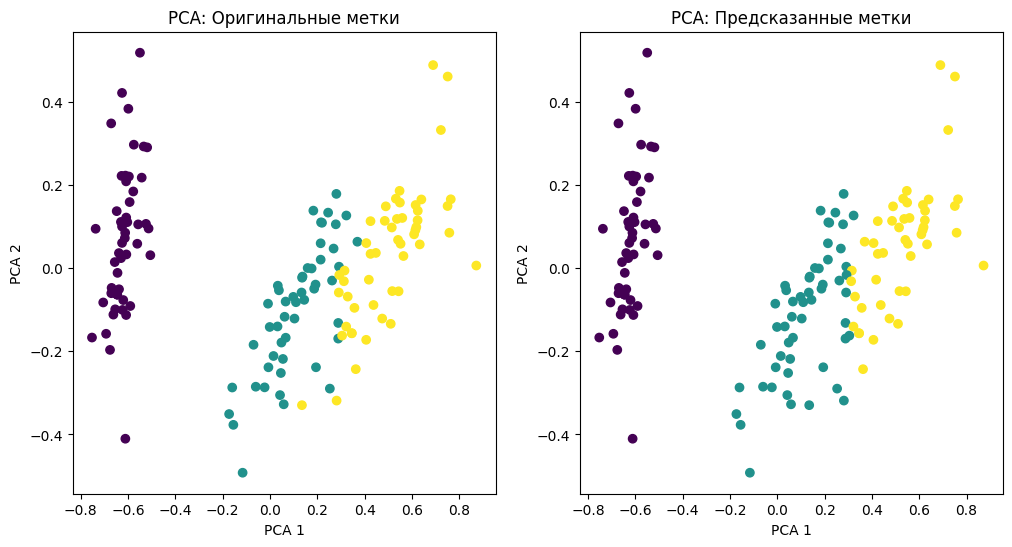

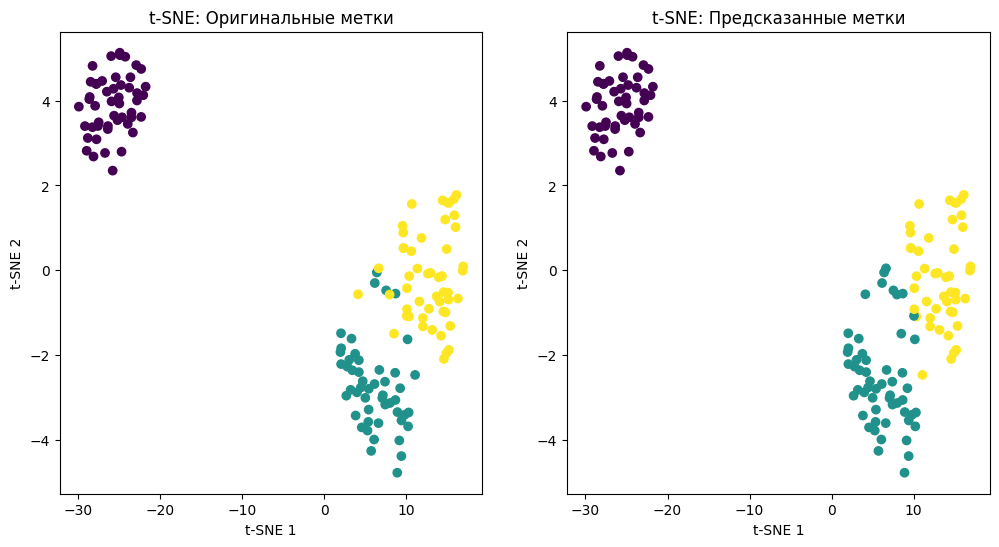

In [21]:
from sklearn.preprocessing import LabelEncoder

# Преобразуем строковые метки в числовые
label_encoder = LabelEncoder()
classes_encoded = label_encoder.fit_transform(classes)

# Визуализируем данные после PCA
plt.figure(figsize=(12, 6))

# PCA с оригинальными метками (преобразованными в числа)
plt.subplot(1, 2, 1)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=classes_encoded, cmap='viridis')
plt.title('PCA: Оригинальные метки')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# PCA с предсказанными метками
plt.subplot(1, 2, 2)
predictions_pca = model.predict(features_normalized)
predictions_encoded = label_encoder.transform(predictions_pca)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=predictions_encoded, cmap='viridis')
plt.title('PCA: Предсказанные метки')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

# Визуализируем данные после t-SNE
plt.figure(figsize=(12, 6))

# t-SNE с оригинальными метками (преобразованными в числа)
plt.subplot(1, 2, 1)
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=classes_encoded, cmap='viridis')
plt.title('t-SNE: Оригинальные метки')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# t-SNE с предсказанными метками
plt.subplot(1, 2, 2)
predictions_tsne = model.predict(features_normalized)
predictions_encoded = label_encoder.transform(predictions_tsne)
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=predictions_encoded, cmap='viridis')
plt.title('t-SNE: Предсказанные метки')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.show()
